### IV

#### (2):

In [27]:
import pandas as pd

# Assuming 'comments' is the column you want to set the max width for
text = pd.read_csv("../csv/crawl.csv")

text


,page_title,comments,url,date,pred_lang
0,Το ΜΑΚΕΛΕΙΟ Προσπαθεί Να Μπλέξει Και Τον HAYATE?,Μλκα ειναι αστείο αυτό το άρθρο ειδικά για εμά...,https://www.youtube.com/watch?v=vSMMBjg_CKc,2023-11-18,Other
1,Το ΜΑΚΕΛΕΙΟ Προσπαθεί Να Μπλέξει Και Τον HAYATE?,Έκλαψα και ο χαγιατε συνεχίζει τις εκπομπές κα...,https://www.youtube.com/watch?v=vSMMBjg_CKc,2023-11-22,Other
2,Το ΜΑΚΕΛΕΙΟ Προσπαθεί Να Μπλέξει Και Τον HAYATE?,Επόμενο live hayate: Τρελό μακελειό με δυνάμει...,https://www.youtube.com/watch?v=vSMMBjg_CKc,2023-11-18,Greek
3,Το ΜΑΚΕΛΕΙΟ Προσπαθεί Να Μπλέξει Και Τον HAYATE?,γελάμε με τον ίδιο τρόπο εντωμεταξύ γάματα,https://www.youtube.com/watch?v=vSMMBjg_CKc,2023-11-18,Greek
4,Το ΜΑΚΕΛΕΙΟ Προσπαθεί Να Μπλέξει Και Τον HAYATE?,μου αρέσει που γελάς και γελάνε και άλλοι μαζί...,https://www.youtube.com/watch?v=vSMMBjg_CKc,2023-11-19,English
...,...,...,...,...,...
276,Σταθακόπουλος: Τα «Γλυπτά του Παρθενώνα» ήταν ...,Κάνε άλλη δουλειά φιλε,https://www.youtube.com/watch?v=avB5OtMKQRc,2023-11-26,Greeklish
277,Σταθακόπουλος: Τα «Γλυπτά του Παρθενώνα» ήταν ...,Τα μάρμαρα έχουν αγοραστεί και αφαιρεθεί με τη...,https://www.youtube.com/watch?v=avB5OtMKQRc,2023-11-27,English
278,Σταθακόπουλος: Τα «Γλυπτά του Παρθενώνα» ήταν ...,O sounak ine o kenourios Tramp.pou o Erdoğan t...,https://www.youtube.com/watch?v=avB5OtMKQRc,2023-11-26,Other
279,Σταθακόπουλος: Τα «Γλυπτά του Παρθενώνα» ήταν ...,His behaviour ( UK PM ) wasn't right. But then...,https://www.youtube.com/watch?v=avB5OtMKQRc,2023-11-27,English


In [28]:
text.date.value_counts()

date
2023-11-28    204
2023-11-18     27
2023-11-26     15
2023-11-25     10
2023-11-19      6
2023-11-27      6
2023-11-22      3
2023-11-24      3
2023-11-20      2
2023-11-21      1
2023-11-23      1
2023-10-07      1
2023-11-14      1
2023-10-24      1
Name: count, dtype: int64

In [29]:
text['comments'].to_csv("../csv/YT_comments.txt", index=True)

In [30]:
"""
    Now, we will import the result of the Toxicity Classification perform by the
    ChatGPT - toxicity classifier we build by prompting.
    
    A vast dictionary of index-of-comment: class label will be build to store
    the info to the the pd.DataFrame we have here.
    
"""
# Build the dictionary
toxicity_classification_dict = {
        0: 4, 1: 2, 2: 5, 3: 2, 4: 2,
        5: 3, 6: 2, 7: 3, 8: 1, 9: 4,
        10: 2, 11: 4, 12: 4, 13: 1, 14: 1,
        15: 2, 16: 2, 17: 2, 18: 2, 19: 4,
        20: 5, 21: 2, 22: 1, 23: 5, 24: 5,
        25: 5, 26: 5, 27: 3, 28: 2, 29: 5,
        30: 3, 31: 2, 32: 1, 33: 5, 34: 5,
        35: 1, 36: 1, 37: 1, 38: 1, 39: 1,
        40: 1, 41: 1, 42: 1, 43: 2, 44: 1,
        45: 2, 46: 1, 47: 1, 48: 2, 49: 2,
        50: 2, 51: 2, 52: 2, 53: 1, 54: 1,
        55: 1, 56: 1, 57: 1, 58: 1, 59: 2,
        60: 2, 61: 1, 62: 5, 63: 2, 64: 2,
        65: 1, 66: 1, 67: 2, 68: 2, 69: 1,
        70: 1, 71: 1, 72: 2, 73: 2, 74: 2,
        75: 2, 76: 2, 77: 2, 78: 2, 79: 2,
        80: 1, 81: 1, 82: 2, 83: 2, 84: 2,
        85: 2,
        
        86: 2, 87: 2, 88: 2, 89: 2, 90: 3,
        91: 4, 92: 3, 93: 2, 94: 3, 95: 2,
        96: 2, 97: 3, 98: 2, 99: 2, 100: 4,
        101: 2, 102: 3, 103: 3, 104: 3, 105: 2,
        106: 3, 107: 3, 108: 3, 109: 4, 110: 3,
        111: 2, 112: 2, 113: 4, 114: 2, 115: 3,
        116: 2, 117: 4, 118: 4, 119: 4, 120: 2,
        121: 2, 122: 3, 123: 3, 124: 4, 125: 2,
        126: 4, 127: 4, 128: 4, 129: 4, 130: 3,
        131: 4, 132: 2, 133: 3, 134: 3, 135: 4,
        136: 2, 137: 4, 138: 4, 139: 4, 140: 4,
        141: 3, 142: 3, 143: 4, 144: 3, 145: 4,
        146: 4, 147: 3, 148: 4, 149: 4, 150: 4,
        151: 4, 152: 4, 153: 4, 154: 3, 155: 2,
        156: 4, 157: 3, 158: 4, 159: 4, 160: 4,
        161: 4, 162: 4, 163: 4, 164: 3, 165: 4,
        166: 4, 167: 3, 168: 4, 169: 4, 170: 4,
        171: 3, 172: 2, 173: 5, 174: 4, 175: 2,
        176: 4,
    
    
        177: 2, 178: 3, 179: 5, 180: 5, 181: 5,
        182: 2, 183: 2, 184: 2, 185: 2, 186: 5,
        187: 2, 188: 5, 189: 5, 190: 5, 191: 2,
        192: 2, 193: 5, 194: 2, 195: 2, 196: 3,
        197: 2, 198: 5, 199: 2, 200: 2, 201: 5,
        202: 2, 203: 5, 204: 5, 205: 3, 206: 5,
        207: 2, 208: 2, 209: 2, 210: 2, 211: 5,
        212: 2, 213: 5, 214: 2, 215: 2, 216: 2,
        217: 2, 218: 5, 219: 2, 220: 2, 221: 5,
        222: 5, 223: 2, 224: 2, 225: 2, 226: 2,
        227: 2, 228: 2, 229: 2, 230: 2, 231: 2,
        232: 2, 233: 2, 234: 2, 235: 2, 236: 2,
        237: 2, 238: 2, 239: 5, 240: 2, 241: 2,
        242: 2, 243: 2, 244: 2, 245: 2, 246: 5,
        247: 2, 248: 2, 249: 2, 250: 2, 251: 2,
        252: 2, 253: 5, 254: 5, 255: 5, 256: 2,
        257: 2, 258: 5, 259: 2, 260: 5, 261: 2, 
        262: 2, 263: 5, 264: 2, 265: 2, 266: 5,
        267: 2, 268: 2, 269: 5, 270: 2, 271: 2,
        272: 2, 273: 5, 274: 2, 275: 2, 276: 5,
        277: 2, 278: 5, 279: 5, 280: 2

}



# Create new column with gpt-toxicity-classificaion labels
text['gpt_toxic_class'] = text.index.map(toxicity_classification_dict)

# Display the updated DataFrame
text

,page_title,comments,url,date,pred_lang,gpt_toxic_class
0,Το ΜΑΚΕΛΕΙΟ Προσπαθεί Να Μπλέξει Και Τον HAYATE?,Μλκα ειναι αστείο αυτό το άρθρο ειδικά για εμά...,https://www.youtube.com/watch?v=vSMMBjg_CKc,2023-11-18,Other,4
1,Το ΜΑΚΕΛΕΙΟ Προσπαθεί Να Μπλέξει Και Τον HAYATE?,Έκλαψα και ο χαγιατε συνεχίζει τις εκπομπές κα...,https://www.youtube.com/watch?v=vSMMBjg_CKc,2023-11-22,Other,2
2,Το ΜΑΚΕΛΕΙΟ Προσπαθεί Να Μπλέξει Και Τον HAYATE?,Επόμενο live hayate: Τρελό μακελειό με δυνάμει...,https://www.youtube.com/watch?v=vSMMBjg_CKc,2023-11-18,Greek,5
3,Το ΜΑΚΕΛΕΙΟ Προσπαθεί Να Μπλέξει Και Τον HAYATE?,γελάμε με τον ίδιο τρόπο εντωμεταξύ γάματα,https://www.youtube.com/watch?v=vSMMBjg_CKc,2023-11-18,Greek,2
4,Το ΜΑΚΕΛΕΙΟ Προσπαθεί Να Μπλέξει Και Τον HAYATE?,μου αρέσει που γελάς και γελάνε και άλλοι μαζί...,https://www.youtube.com/watch?v=vSMMBjg_CKc,2023-11-19,English,2
...,...,...,...,...,...,...
276,Σταθακόπουλος: Τα «Γλυπτά του Παρθενώνα» ήταν ...,Κάνε άλλη δουλειά φιλε,https://www.youtube.com/watch?v=avB5OtMKQRc,2023-11-26,Greeklish,5
277,Σταθακόπουλος: Τα «Γλυπτά του Παρθενώνα» ήταν ...,Τα μάρμαρα έχουν αγοραστεί και αφαιρεθεί με τη...,https://www.youtube.com/watch?v=avB5OtMKQRc,2023-11-27,English,2
278,Σταθακόπουλος: Τα «Γλυπτά του Παρθενώνα» ήταν ...,O sounak ine o kenourios Tramp.pou o Erdoğan t...,https://www.youtube.com/watch?v=avB5OtMKQRc,2023-11-26,Other,5
279,Σταθακόπουλος: Τα «Γλυπτά του Παρθενώνα» ήταν ...,His behaviour ( UK PM ) wasn't right. But then...,https://www.youtube.com/watch?v=avB5OtMKQRc,2023-11-27,English,5


In [60]:
text.to_csv("../csv/crawl.csv", index=False)

(3):

In [31]:
# Get info about the crawl.csv we created at this point
text.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   page_title       281 non-null    object
 1   comments         281 non-null    object
 2   url              281 non-null    object
 3   date             281 non-null    object
 4   pred_lang        281 non-null    object
 5   gpt_toxic_class  281 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 13.3+ KB


In [32]:
df = text
print(f"Total Na values:\n{df.isna().sum()}")



Total Na values:
page_title         0
comments           0
url                0
date               0
pred_lang          0
gpt_toxic_class    0
dtype: int64


#### (a):

In [37]:
max_sum = 0
max_language = ""

for language in df["pred_lang"].unique():
    subset = df[(df.pred_lang == language) & (df.gpt_toxic_class.isin([4, 5]))]
    current_sum = len(subset)
    
    print(f"Language: {language}, Number of toxic comments: {current_sum}")
    
    # Check if the current sum is greater than the maximum
    if current_sum > max_sum:
        max_sum = current_sum
        max_language = language

print(f"\nLanguage with the highest toxicity: {max_language}, Number of toxic comments: {max_sum}")


Language: Other, Number of toxic comments: 33
Language: Greek, Number of toxic comments: 12
Language: English, Number of toxic comments: 25
Language: Greeklish, Number of toxic comments: 19

Language with the highest toxicity: Other, Number of toxic comments: 33


#### (b):

In [41]:
max_rate = 0
max_url = ""

for page in df["url"].unique():
    total_comments = len(df[df.url == page])
    toxic_comments = len(df[(df.url == page) & (df.gpt_toxic_class.isin([4, 5]))])
    
    # Calculate the rate of toxic comments
    current_rate = toxic_comments / total_comments if total_comments > 0 else 0
    
    print(f"Page's url: {page}, Rate: {current_rate:.2f}")
    
    # Check if the current rate is greater than the maximum
    if current_rate > max_rate:
        max_rate = current_rate
        max_url = page

print(f"\nPage with the highest rate of toxic comments: {max_url}, Highest rate: {max_rate:.2f}")


Page's url: https://www.youtube.com/watch?v=vSMMBjg_CKc, Rate: 0.34
Page's url: https://www.youtube.com/watch?v=gf2BG6ZFe2A, Rate: 0.04
Page's url: https://www.youtube.com/watch?v=X1ev3RxDnNI, Rate: 0.35
Page's url: https://www.youtube.com/watch?v=avB5OtMKQRc, Rate: 0.34

Page with the highest rate of toxic comments: https://www.youtube.com/watch?v=X1ev3RxDnNI, Highest rate: 0.35


#### (c):

In [35]:
# Sort by 'url' and 'date' at the same time
result_df = df.sort_values(by=['url', 'date']).reset_index(drop=True)

# View the sorted df
result_df[:3]



,page_title,comments,url,date,pred_lang,gpt_toxic_class
0,ΑΜΕΤΑΝΟΗΤΟΣ Μπέος βγαίνει στον ΑΝΤ1 και τα ΞΑΝ...,Παρακαλω Πολυ .,https://www.youtube.com/watch?v=X1ev3RxDnNI,2023-11-26,Greeklish,2
1,ΑΜΕΤΑΝΟΗΤΟΣ Μπέος βγαίνει στον ΑΝΤ1 και τα ΞΑΝ...,"""Από την Ιαπωνία μου στείλανε συνχαρητηρια""\nΝ...",https://www.youtube.com/watch?v=X1ev3RxDnNI,2023-11-28,Other,2
2,ΑΜΕΤΑΝΟΗΤΟΣ Μπέος βγαίνει στον ΑΝΤ1 και τα ΞΑΝ...,Μπράβο ρε Άντρα!!!! Μόνο εσύ,https://www.youtube.com/watch?v=X1ev3RxDnNI,2023-11-28,Greeklish,1


gpt_toxic_class
4    46
5    43
Name: count, dtype: int64


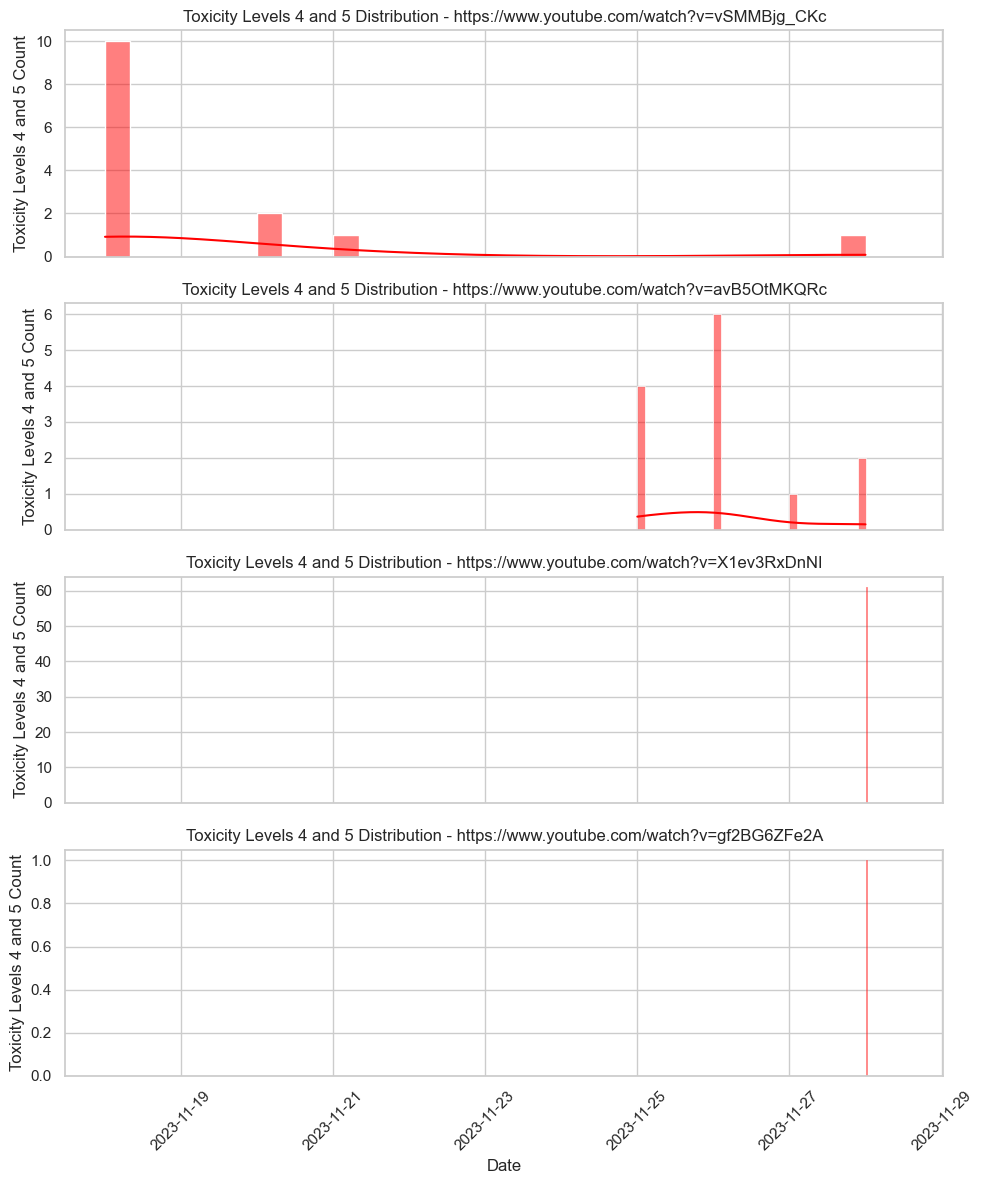

In [59]:
import pandas as pd , matplotlib.pyplot as plt, seaborn as sns

# Filter the DataFrame for toxicity levels 4 and 5
high_toxicity_data = result_df[result_df['gpt_toxic_class'].isin([4, 5])]

# Convert the 'date' column to datetime format
high_toxicity_data.loc[:, 'date'] = pd.to_datetime(high_toxicity_data['date'])

print(high_toxicity_data['gpt_toxic_class'].value_counts())

# Sort the DataFrame by the 'date' column
high_toxicity_data = high_toxicity_data.sort_values(by='date')


# Set the style for seaborn
sns.set(style="whitegrid")

# Create subplots for each URL
unique_urls = high_toxicity_data['url'].unique()
fig, axes = plt.subplots(nrows=len(unique_urls), figsize=(10, 12), sharex=True)

# Iterate over each URL
for i, url in enumerate(unique_urls, 1):
    # Filter the data for the current URL
    url_data = high_toxicity_data[high_toxicity_data['url'] == url]
    
    # Plot the distribution over time
    sns.histplot(data=url_data, x='date', kde=True, bins=30, ax=axes[i-1], color='red')
    
    # Set labels and title
    axes[i-1].set_ylabel(f'Toxicity Levels 4 and 5 Count')
    axes[i-1].set_xlabel('Date')
    axes[i-1].set_title(f'Toxicity Levels 4 and 5 Distribution - {url}')
    
    # Rotate x-axis labels for the current subplot
    axes[i-1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show()